# Comparing the Performance of Two Optimizer Algorithms Using a Simple Neural Network

## Abstract
---

---

## Learning Objectives
---
- Objective 1
- Objective 2
- Objective 3
---

## Contents
---
- Creating Model for Neural Network...............................................................................................................................................
- Loading Dataset......................................................................................................................................................................................
- Train, Test, Split of Dataset..................................................................................................................................................................
- Training Model with Adam Optimizer............................................................................................................................................
- Training Model with SGD Optimizer...............................................................................................................................................
- Optimizer Comparison.........................................................................................................................................................................
    - Comparing Number of Correct Predictions......................................................................................................................
    - Comparing Efficiency of Optimizers....................................................................................................................................
- References.................................................................................................................................................................................................
---

In [281]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
%matplotlib inline

### Creating the Model for the Neural Network
---

In [282]:
#Create a Model Class
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=12, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x

In [283]:
torch.manual_seed(55)
model1 = Model()
model2 = Model()

---

### Loading in Dataset
---

In [284]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [285]:
#Change last column from strings to numbers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


---

### Train Test Split
---

In [286]:
#Train Test Split
X = my_df.drop('species', axis=1)
y = my_df['species']
X2 = my_df.drop('species', axis=1)
y2 = my_df['species']

In [287]:
#Convert to numpy arrays
X = X.values
y = y.values
X2 = X2.values
y2 = y2.values

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=55)

In [289]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X2_train = torch.FloatTensor(X2_train)
X2_test = torch.FloatTensor(X2_test)

In [290]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y2_train = torch.LongTensor(y2_train)
y2_test = torch.LongTensor(y2_test)

In [291]:
criterion = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)


---

### Training Model with Adam Optimizer Algorithm
---

In [ ]:
#Train model
epochs = 500
lossesAdam = []

for i in range(epochs):
    #Forward
    y_pred = model1.forward(X_train)

    #Measure error
    loss = criterion(y_pred, y_train)

    #Keep track of losses
    lossesAdam.append(loss.detach().numpy())

    #Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [293]:
#Evaluate Model on Test Data Set
with torch.no_grad():
    y_eval = model1.forward(X_test)
    loss = criterion(y_eval, y_test)


---

### Training Model with SGD Optimizer Algorithm
---

In [ ]:
epochs = 500
lossesSGD = []
for i in range(epochs):
    #Forward
    y2_pred = model2.forward(X2_train)

    #Measure error
    loss2 = criterion2(y2_pred, y2_train)

    #Keep track of losses
    lossesSGD.append(loss2.detach().numpy())

    #Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss2}')

    #Backpropagation
    optimizer2.zero_grad()
    loss2.backward()
    optimizer2.step() 

In [295]:
with torch.no_grad():
    y2_eval = model2.forward(X2_test)
    loss2 = criterion2(y2_eval, y2_test)

---

In [296]:
loss
loss2

tensor(0.4691)

Text(0.5, 0, 'Epoch')

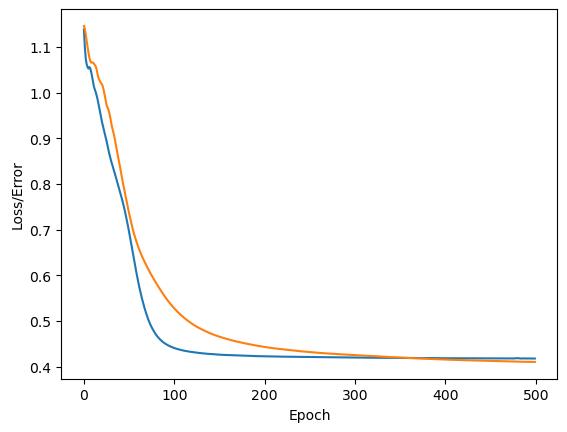

In [297]:
plt.plot(range(epochs),lossesAdam , lossesSGD)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

### Comparing the Predicted Class to Actual Class
---

In [ ]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model1.forward(data)

        # what type of flower network thinks
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'we got {correct} correct')

correct2 = 0
with torch.no_grad():
    for i, data2 in enumerate(X2_test):
        y2_val = model2.forward(data2)

        # what type of flower network thinks
        print(f'{i+1}.) {str(y2_val)} \t {y2_test[i]} \t {y2_val.argmax().item()}')

        # correct or not
        if y2_val.argmax().item() == y2_test[i]:
            correct2 += 1

print(f'we got {correct2} correct')

---

### Comparing the Two Optimizer Algorithms
---

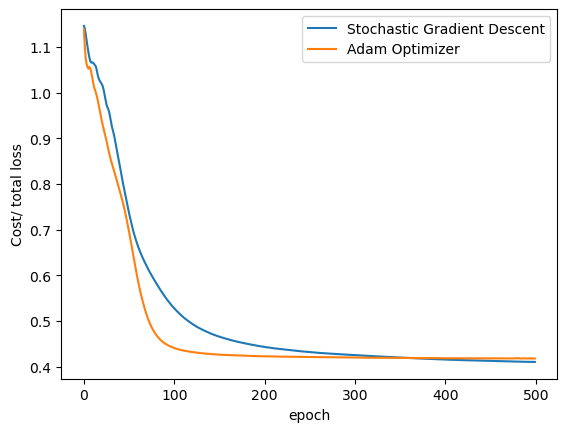

In [299]:
plt.plot(lossesSGD,label = "Stochastic Gradient Descent")
plt.plot(lossesAdam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

---

### References
---

---